# Limpieza y PCA

En este notebook se hace una limpieza, formateo, estandarización y creación de nuevas variables para facilitar un analisis de la data disponible para el estudio

Para la creación de nuevas variables se hace uso del metodo de PCA para reducir el número de variables que describan la data.

## Objetivos

- Facilitar el uso de la data a los analistas
- Estandarizar la data en un formato interno

## Importación de librerias necesarias

In [39]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import cv2
import json
import seaborn as sns
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
os.chdir("/content/drive/Shared drives/Tecnicas de aprendizaje estadistico/Trabajo 3")

Mounted at /content/drive


## Lectura de los datos y exploración inicial

Se leen las bases de datos dispuestas en https://data.world/exercises/cluster-analysis-exercise-2 acompañado de su diccionario de datos y su respectiva documentación

### Acerca de los datos

>The College Scorecard project is designed to increase transparency, putting the power in the hands of students and families to compare colleges and see how well schools are preparing their students to be successful. This project provides more data than ever before to help students and families compare
college costs and outcomes as they weigh the tradeoffs of different colleges, accounting for their own needs and educational goals.
These data are provided through federal reporting from institutions, data on federal financial aid, and tax information. These data provide insights into the performance of schools that receive federal financial aid dollars, and the outcomes of the students of those schools.




In [40]:
data = pd.read_csv('datasets/CollegeScorecard.csv')

In [41]:
dictionary = pd.read_csv('datasets/CollegeScorecardDataDictionary-09-12-2015.csv')

In [42]:
df = data.copy()
n = len(df)

In [43]:
df.shape

(7804, 1725)

## Analisis superficial de los datos

### Resumen de los datos númericos

A continuación se muestra una tabla con los datos númericos disponibles

In [44]:
df.describe()

,UNITID,OPEID,opeid6,sch_deg,HCM2,main,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,...,pct25_earn_wne_p8,pct75_earn_wne_p8,pct90_earn_wne_p8,sd_earn_wne_p8,gt_25k_p8,count_nwne_p9,count_wne_p9,mn_earn_wne_p9,sd_earn_wne_p9,gt_25k_p9
count,7.804000e+03,7.804000e+03,7804.000000,0.0,7804.000000,7804.000000,7804.000000,7804.000000,7804.00000,7804.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.705430e+06,2.032428e+06,16121.271271,NaN,0.008842,0.731548,8.334956,1.788954,2.17632,2.216427,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,6.789848e+06,4.281088e+06,13663.764753,NaN,0.093619,0.443182,24.068238,1.034792,1.31764,0.837223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.006540e+05,1.002000e+05,1002.000000,NaN,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.743918e+05,3.455750e+05,3439.750000,NaN,0.000000,0.000000,1.000000,1.000000,1.00000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.306000e+05,1.063100e+06,10490.000000,NaN,0.000000,1.000000,1.000000,2.000000,2.00000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.462262e+05,2.616779e+06,25785.000000,NaN,0.000000,1.000000,3.000000,3.000000,4.00000,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,4.828571e+07,8.209882e+07,42264.000000,NaN,1.000000,1.000000,141.000000,4.000000,4.00000,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Columnas en la data

Se listan todas las columnas disponibles y se encuentran 1725 columnas en total

In [45]:
df.columns

Index(['UNITID', 'OPEID', 'opeid6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'AccredAgency', 'INSTURL', 'NPCURL',
       ...
       'COMPL_RPY_3YR_RT_SUPP', 'NONCOM_RPY_3YR_RT_SUPP',
       'DEP_RPY_3YR_RT_SUPP', 'IND_RPY_3YR_RT_SUPP', 'PELL_RPY_3YR_RT_SUPP',
       'NOPELL_RPY_3YR_RT_SUPP', 'FEMALE_RPY_3YR_RT_SUPP',
       'MALE_RPY_3YR_RT_SUPP', 'FIRSTGEN_RPY_3YR_RT_SUPP',
       'NOTFIRSTGEN_RPY_3YR_RT_SUPP'],
      dtype='object', length=1725)

### Muestra de los datos

Se lista una muestra visual de los datos

In [46]:
df.sample(5)

,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,...,COMPL_RPY_3YR_RT_SUPP,NONCOM_RPY_3YR_RT_SUPP,DEP_RPY_3YR_RT_SUPP,IND_RPY_3YR_RT_SUPP,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP
5360,436182,2609202,26092,Vatterott College-St Joseph,Saint Joseph,MO,64506,Accrediting Commission of Career Schools and C...,www.vatterott.edu,www.vatterott.edu/calculator/,...,0.378117458,0.231552163,0.403409091,0.278911565,0.279027077,0.530769231,0.334172964,0.278582931,0.274176408,0.361111111
4568,368540,2521801,25218,Seguin Beauty School-New Braunfels,New Braunfels,TX,78130,NaN,www.seguinbeautyschool.net,seguinbeautyschool.net/netprice/npcalc,...,0.606060606,0.303030303,0.47826087,0.441860465,0.439655172,PrivacySuppressed,0.453125,PrivacySuppressed,0.451612903,0.472222222
2032,176637,732923,7329,ITT Technical Institute-Earth City,Earth City,MO,63045,NaN,www.itt-tech.edu,www.itt-tech.edu/npc,...,0.561858455,0.349477763,0.438945421,0.378682709,0.354247028,0.503267974,0.394425214,0.393501191,0.388345718,0.427468099
3398,215415,743700,7437,Pittsburgh Technical Institute,Oakdale,PA,15071,Middle States Commission on Higher Education,www.pti.edu,npc.collegeboard.org/student/app/pti,...,0.775708502,0.472906404,0.655926352,0.582867784,0.568943299,0.788381743,0.637795276,0.638170974,0.631182796,0.667770419
4806,391582,2569305,25693,Sanford-Brown College-Collinsville,Collinsville,IL,62234-6108,NaN,www.sanford-brown.edu,sanfordbrown.studentaidcalculator.com,...,0.45491491,0.220161008,0.465553236,0.312372397,0.277841561,0.611076149,0.349858721,0.362248439,0.346767757,0.423551402


## Limpieza de los datos

### Privacy suppressed

Se identifica que en algunas columnas tienen algunos datos con el string "PrivacySuppressed" que no permiten que la columna sea leída por pandas como númerica, lo cual nos genera incoherencias, por lo que para solucionar esta situación se decide reemplazar estos valores por valores vacios NAN para que sean identificados como datos invalidos para realizar calculos, pero que permitan a la columna comportarse como númerico

In [47]:
buffer1 = []
for i in df.columns:
  aty_qty = (df[i] == "PrivacySuppressed").sum()
  buffer1.append([i, aty_qty*100/n])
buffer1 = pd.DataFrame(buffer1, columns=["Columna", "Con PrivacySuppressed"])
buffer1.set_index('Columna', inplace=True)

#### Proporción columnas con valor PrivacySupressed

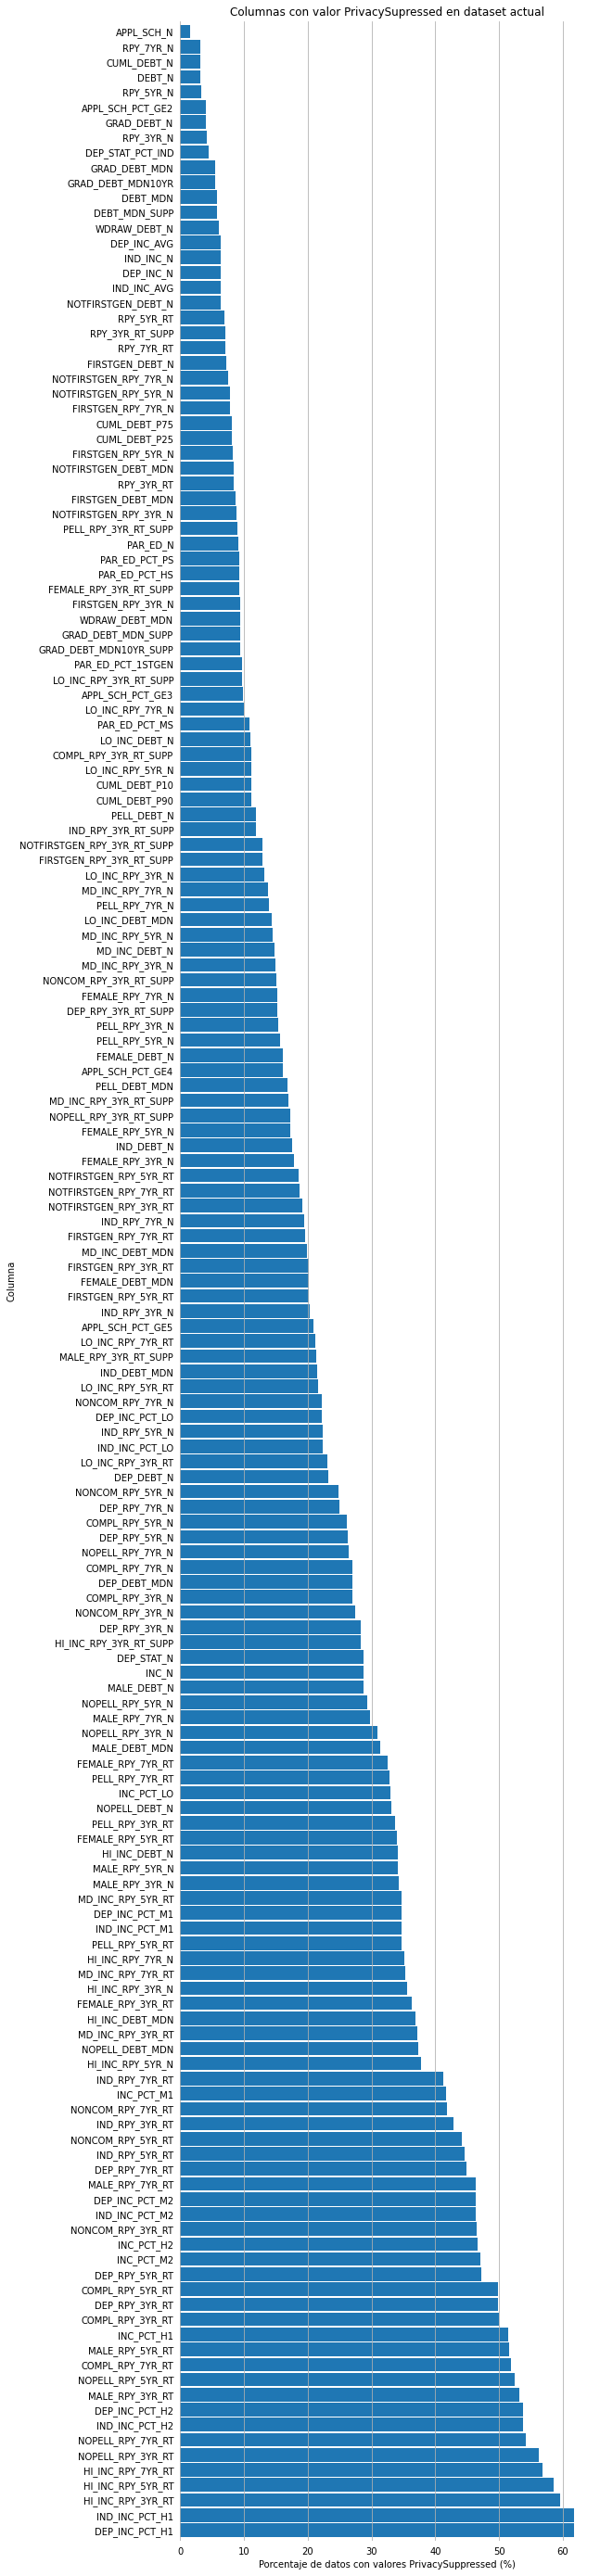

In [48]:
plt.figure(figsize=(8, 50))
buffer1[buffer1['Con PrivacySuppressed'] > 0]['Con PrivacySuppressed'].sort_values(ascending=False).plot.barh(width=0.9)

plt.box(False)
plt.grid(axis='x')
plt.xlabel('Porcentaje de datos con valores PrivacySuppressed (%)')
plt.ylabel('Columna')
plt.title('Columnas con valor PrivacySupressed en dataset actual')
plt.tick_params(bottom=False, left=False)
plt.show()

## Datos faltantes

Se realiza un analisis de los datos faltantes o NAN, para identificar irregularidades con los datos y posibles mejoras.

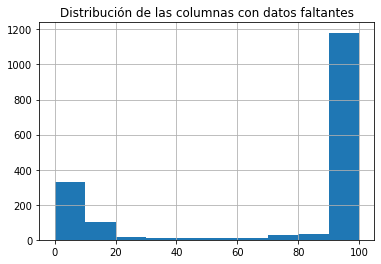


Se encuentran 1174 columnas con el 100% de sus datos en NAN


In [49]:
buffer2 = []
for i in df.columns:
  aty_qty = (df[i].isna()).sum()
  # if aty_qty > 0:
  buffer2.append([i, aty_qty*100/n])#, nan_qty*100/n])
buffer2 = pd.DataFrame(buffer2, columns=["Columna", "faltantes"])
buffer2.set_index('Columna', inplace=True)
buffer2.hist("faltantes")
plt.title("Distribución de las columnas con datos faltantes")
plt.show()
print(f"\nSe encuentran {len(buffer2[buffer2['faltantes'] == 100])} columnas con el 100% de sus datos en NAN")

Se identifica una gran proporción de datos faltantes en el 100% en la mayoría de columnas

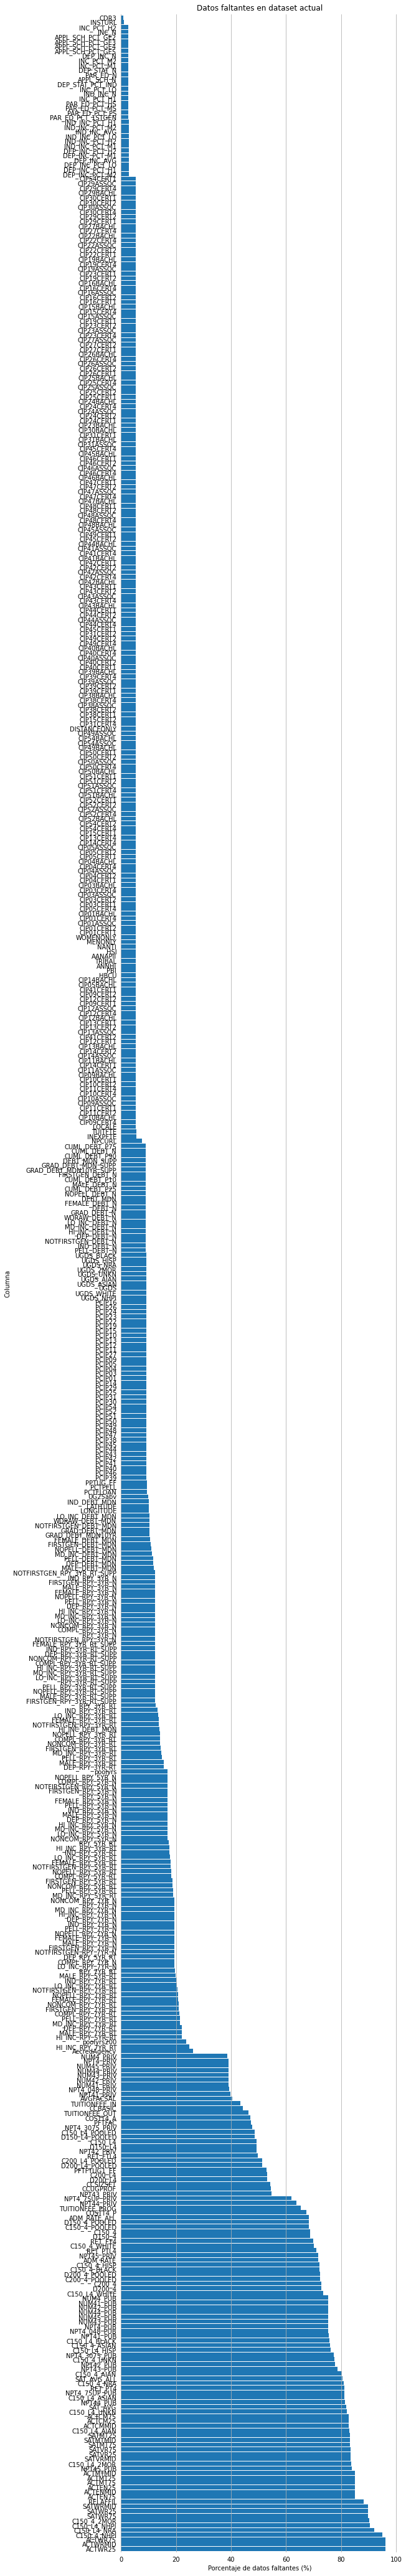

In [50]:
plt.figure(figsize=(8, 75))
buffer2[(buffer2["faltantes"] > 0) & (buffer2["faltantes"] < 100)]['faltantes'].sort_values(ascending=False).plot.barh(width=0.9)

plt.box(False)
plt.grid(axis='x')
plt.xlabel('Porcentaje de datos faltantes (%)')
plt.ylabel('Columna')
plt.title('Datos faltantes en dataset actual')
plt.tick_params(bottom=False, left=False)
plt.show()

In [51]:
buffer = pd.merge(buffer1, buffer2, left_index=True, right_index=True)
buffer["No aprovechable"] = buffer["faltantes"] + buffer["Con PrivacySuppressed"]

In [52]:
len(buffer[buffer["No aprovechable"] == 100])

1174

Esto nos indica que las columnas que tienen 100% de datos faltantes no son útiles para nuestro estudio.

Debido a la cantidad de columnas totales y a la poca información que aportan, se decide eliminar estas columnas. Sin embargo, surgen ciertas dudas del porqué faltan este tipo de datos.

In [53]:
print(f'Quedando así con {len(buffer[buffer["faltantes"] < 100])} columnas\n')
print("Columnas de tipo STRING")
df1 = df[buffer[buffer["faltantes"] < 100].index]
num_cols = 0
for i in df1.columns:
  df1[i] = df[i].where(df1[i] != "PrivacySuppressed")
  try:
    df1[i] = df1[i].astype(np.float64)
    num_cols += 1
  except ValueError:
    print(f"  * {i}")
  #df1[df1[i] == "PrivacySuppressed"][i] = np.nan

Quedando así con 551 columnas

Columnas de tipo STRING
  * INSTNM
  * CITY
  * STABBR
  * ZIP
  * AccredAgency
  * INSTURL
  * NPCURL


### Resumen de los datos reformateados

In [54]:
df1.describe()

,UNITID,OPEID,opeid6,HCM2,main,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,st_fips,...,COMPL_RPY_3YR_RT_SUPP,NONCOM_RPY_3YR_RT_SUPP,DEP_RPY_3YR_RT_SUPP,IND_RPY_3YR_RT_SUPP,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP
count,7.804000e+03,7.804000e+03,7804.000000,7804.000000,7804.000000,7804.000000,7804.000000,7804.00000,7804.000000,7804.000000,...,5965.000000,5654.000000,5639.000000,5901.000000,6135.000000,5482.000000,6106.000000,5169.000000,5820.000000,5825.000000
mean,1.705430e+06,2.032428e+06,16121.271271,0.008842,0.731548,8.334956,1.788954,2.17632,2.216427,28.961558,...,0.698978,0.511367,0.637070,0.551333,0.550735,0.724572,0.605994,0.572759,0.587614,0.622892
std,6.789848e+06,4.281088e+06,13663.764753,0.093619,0.443182,24.068238,1.034792,1.31764,0.837223,16.669313,...,0.193794,0.216585,0.199887,0.191669,0.201190,0.161263,0.206393,0.218553,0.199879,0.204751
min,1.006540e+05,1.002000e+05,1002.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,...,0.032258,0.043956,0.045455,0.031250,0.042553,0.147059,0.060241,0.043796,0.056338,0.021277
25%,1.743918e+05,3.455750e+05,3439.750000,0.000000,0.000000,1.000000,1.000000,1.00000,1.000000,13.000000,...,0.561858,0.340335,0.475314,0.397260,0.389044,0.597067,0.446481,0.405263,0.432379,0.461847
50%,2.306000e+05,1.063100e+06,10490.000000,0.000000,1.000000,1.000000,2.000000,2.00000,2.000000,29.000000,...,0.711276,0.478737,0.633333,0.533333,0.529617,0.729680,0.598226,0.547753,0.573178,0.612903
75%,4.462262e+05,2.616779e+06,25785.000000,0.000000,1.000000,3.000000,3.000000,4.00000,3.000000,42.000000,...,0.867647,0.698165,0.810423,0.711538,0.718408,0.861283,0.783304,0.763359,0.755885,0.804878
max,4.828571e+07,8.209882e+07,42264.000000,1.000000,1.000000,141.000000,4.000000,4.00000,3.000000,78.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Separación de dataframe de variables continuas del string

In [55]:
string_columns = {"INSTNM", "CITY", "STABBR", "ZIP", "AccredAgency", "INSTURL", "NPCURL"}
only_n_df = df1[set(df1.columns)-string_columns]

## Reducción de dimensionalidad del dataset

Se realiza un PCA para reducir la dimensiolidad del conjunto de datos originales, lo que permite agrupar mejor las instituciones y conocer sus caracteristicas.

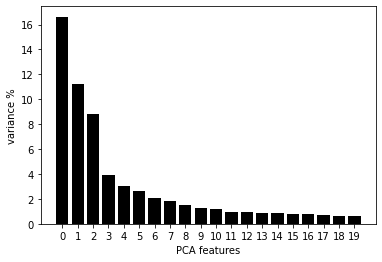

La varianza explicada por las 3 primeras componentes principales es: 36.67%


In [56]:
only_n_df.fillna(0, inplace=True)
df_final = StandardScaler().fit_transform(only_n_df)

pca = PCA(n_components=20)
principalComponents = pca.fit_transform(df_final)

# Mostrar las varianzas explicadas
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_*100, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()
total_var = pca.explained_variance_ratio_[:3].sum() * 100
print(f"La varianza explicada por las 3 primeras componentes principales es: {total_var:.2f}%")

PCA_components = pd.DataFrame(principalComponents)
PCA_components = PCA_components.iloc[:,:3]


Se seleccionan 3 componentes principales debido a que de aqui en adelante la cantidad de varianza que aporta cada componente es baja y no incrementa mucho la conseguida con las 3 primeras componentes. Pese a que la varianza obtenida es bastante baja 36.67%, se decide continuar adelante con el problema con fines academicos. 

## Aporte de variables originales a cada una de las 3 primeras componentes principales.

In [57]:
columnas = list(only_n_df.columns)
diccionario = {}
for i in range(3):
  diccionario["PCA"+str(i)] = {}
  for j in range(len(columnas)):
    diccionario["PCA"+str(i)][columnas[j]] = pca.components_[i][j]

for k in range(3):  
  sort_orders = sorted(diccionario["PCA"+str(k)].items(), key=lambda x: x[1], reverse=True)
  print(f"Para la componente {k+1} las 3 variables que mas otorgan a su construcción mediante una combinación lineal son:")
  print(f"{sort_orders[0][0]}: {sort_orders[0][1]}")
  print(f"{sort_orders[1][0]}: {sort_orders[1][1]}")
  print(f"{sort_orders[2][0]}: {sort_orders[2][1]}")


Para la componente 1 las 3 variables que mas otorgan a su construcción mediante una combinación lineal son:
CCSIZSET: 0.08592722295997987
NONCOM_RPY_3YR_RT_SUPP: 0.08231054854679523
CCUGPROF: 0.08222349903561925
Para la componente 2 las 3 variables que mas otorgan a su construcción mediante una combinación lineal son:
IND_DEBT_N: 0.1193743300399438
FEMALE_DEBT_N: 0.11897247411669573
LO_INC_RPY_3YR_N: 0.11861156542767884
Para la componente 3 las 3 variables que mas otorgan a su construcción mediante una combinación lineal son:
CIP15CERT2: 0.10675153559340139
CIP15CERT1: 0.10549905935270977
CIP24CERT2: 0.10469009035014105


## Explicación de las componentes principales

**PCA 1**

**CCSIZSET**: Puntaje de clasificación carnegie para colegios y universidades en estados unidos. (Tamaño y configuración)

**NONCOM_RPY_3YR_RT_SUPP**: Tasa de reembolso a 3 años para los que no terminan.

**CCUGPROF**: Puntaje de clasificación carnegie para coiegios y universidades en estados unidos. (Perfil de no graduados)

***Resumen del componente principal***: Componente relacionada con el puntaje Carnegie y las tasas de reembolso de la institución.

<br>

**PCA 2**

**IND_DEBT_N**: El número de estudiantes en la cohorte de estudiantes independientes con deuda media.

**FEMALE_DEBT_N**: El número de estudiantes en la cohorte de estudiantes femeninas con deuda media.

**LO_INC_RPY_3YR_N**: Número de estudiantes en la cohorte de estudiantes de bajos ingresos (menos de 30.000 dólares de ingresos familiares nominales) con una tasa de reembolso de 3 años.

***Resumen del componente principal***: Componente relacionada con la cantidad de estudiantes independientes que tienen una deuda media y el numero de estudiantes con bajos ingresos.

<br>

**PCA 3**

**CIP15CERT2**: Certificado de al menos uno pero menos de dos años académicos en Tecnologías de la Ingeniería y Campos Relacionados con la Ingeniería.

**CIP15CERT1**: Certificado de menos de un año académico en Tecnologías de la Ingeniería y Campos Relacionados con la Ingeniería.

**CIP24CERT2**: Certificado de al menos uno pero menos de dos años académicos en Artes Liberales y Ciencias, Estudios Generales y Humanidades.

***Resumen del componente principal***: Componente relacionada con los certificados obtenidos por la institución


## Guardar conjuntos de datos modificados

Se guardan los datos con un formato estandarizado para su posterior uso en otros notebooks

In [58]:
dataframe_name_to_export_1 = "formatted_data_PCA.csv"
dataframe_name_to_export_2 = "formatted_data.csv"
PCA_components.to_csv("datasets/" + dataframe_name_to_export_1, index=False)
df1.to_csv("datasets/" + dataframe_name_to_export_2, index=False)